In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
print("==== 행렬과 역행렬 Heatmap 시각화 프로그램 ====")

==== 행렬과 역행렬 Heatmap 시각화 프로그램 ====


In [38]:
# 1. 행렬 입력 기능

n = int(input("정방행렬의 크기 n을 입력하세요: "))

matrix = []
print(f"{n} x {n} 행렬을 행 단위로 입력하세요 (예: 1 2 3):")
for i in range(n):
    row = list(map(int, input(f"{i+1}행: ").split()))
    if len(row) != n:
        raise ValueError(f"{n}개의 숫자를 입력해야 합니다.")
    matrix.append(row)

matrix = np.array(matrix)
print("\n입력된 행렬:")
print(matrix)


정방행렬의 크기 n을 입력하세요: 3
3 x 3 행렬을 행 단위로 입력하세요 (예: 1 2 3):
1행: 1 4 2
2행: 1 5 3
3행: 1 4 6

입력된 행렬:
[[1 4 2]
 [1 5 3]
 [1 4 6]]


In [39]:
def inverse_by_determinant_manual(A):
    det = np.linalg.det(A)
    if np.isclose(det, 0):
        raise ValueError("행렬식이 0이며 역행렬은 존재하지 않습니다.")

    n = A.shape[0]

    # cofactor 구하기
    cofactor_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            minor = np.delete(np.delete(A, i, axis=0), j, axis=1)
            cofactor = ((-1) ** (i + j)) * np.linalg.det(minor)
            cofactor_matrix[i, j] = cofactor

    # 전치 (adjugate matrix)
    adjugate = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            adjugate[j, i] = cofactor_matrix[i, j]

    # 역행렬 = adj(A) / det(A)
    inv_matrix = adjugate / det

    # 소수점 2자리 반올림 & -0 제거
    inv_matrix = np.round(inv_matrix, 2)
    inv_matrix[np.isclose(inv_matrix, 0)] = 0.0

    return inv_matrix

try:
    inv_det = inverse_by_determinant_manual(matrix)
    print("\n행렬식을 이용한 역행렬: ")
    print(inv_det)
except ValueError as e:
    print(e)
    inv_det = None


행렬식을 이용한 역행렬: 
[[ 4.5  -4.    0.5 ]
 [-0.75  1.   -0.25]
 [-0.25  0.    0.25]]


In [40]:
import numpy as np

def inverse_by_gauss_jordan(A):
    n = A.shape[0]
    A_ext = np.hstack([A.astype(float), np.eye(n)])

    for i in range(n):
        if A_ext[i, i] == 0:
            for j in range(i+1, n):
                if A_ext[j, i] != 0:
                    A_ext[[i,j]] = A_ext[[j,i]]
                    break
        if A_ext[i, i] == 0:
            raise ValueError("역행렬은 존재하지 않습니다.")

        A_ext[i] = A_ext[i] / A_ext[i, i]
        for j in range(n):
            if j != i:
                A_ext[j] -= A_ext[j, i] * A_ext[i]

    inv_matrix = A_ext[:, n:]

    # 소수점 2자리로 반올림 & -0 제거
    inv_matrix = np.round(inv_matrix, 2)
    inv_matrix[np.isclose(inv_matrix, 0)] = 0.0

    return inv_matrix

try:
    inv_gj = inverse_by_gauss_jordan(matrix)
    print("\n가우스-조던 소거법을 이용한 역행렬: ")
    print(inv_gj)
except ValueError as e:
    print(e)
    inv_gj = None


가우스-조던 소거법을 이용한 역행렬: 
[[ 4.5  -4.    0.5 ]
 [-0.75  1.   -0.25]
 [-0.25  0.    0.25]]


In [41]:
if inv_det is not None and inv_gj is not None:
    # 소수점 둘째 자리까지 반올림 후 비교
    rounded_det = np.round(inv_det, 2)
    rounded_gj = np.round(inv_gj, 2)

    comparison = "=" if np.allclose(rounded_det, rounded_gj) else "!="
    print("\n두 방법으로 계산한 역행렬 비교:")
    print(f"결과 비교: {comparison}")
else:
    comparison = "N/A"
    print("\n한쪽 또는 양쪽 역행렬이 존재하지 않아 비교할 수 없습니다.")


두 방법으로 계산한 역행렬 비교:
결과 비교: =


In [43]:
def validate_inverse_manual(A, inv_A, tol=1e-6):
    """
    반복문을 이용한 역행렬 검산
    A: 원래 행렬
    inv_A: 계산된 역행렬
    tol: 허용 오차
    """
    if inv_A is None:
        return False

    n = A.shape[0]
    for i in range(n):
        for j in range(n):
            s = 0
            for k in range(n):
                s += A[i][k] * inv_A[k][j]
            # 단위행렬과 비교
            if i == j:
                if abs(s - 1) > tol:
                    return False
            else:
                if abs(s) > tol:
                    return False
    return True


# 실행 예시
valid_det = validate_inverse_manual(matrix, inv_det)
valid_gj = validate_inverse_manual(matrix, inv_gj)

print("\n검산 결과 (반복문 기반):")
print(f"- 행렬식 방식 역행렬 검산 결과: {'정확함' if valid_det else '부정확함'}")
print(f"- 가우스-조던 소거법 역행렬 검산 결과: {'정확함' if valid_gj else '부정확함'}")


검산 결과 (반복문 기반):
- 행렬식 방식 역행렬 검산 결과: 정확함
- 가우스-조던 소거법 역행렬 검산 결과: 정확함


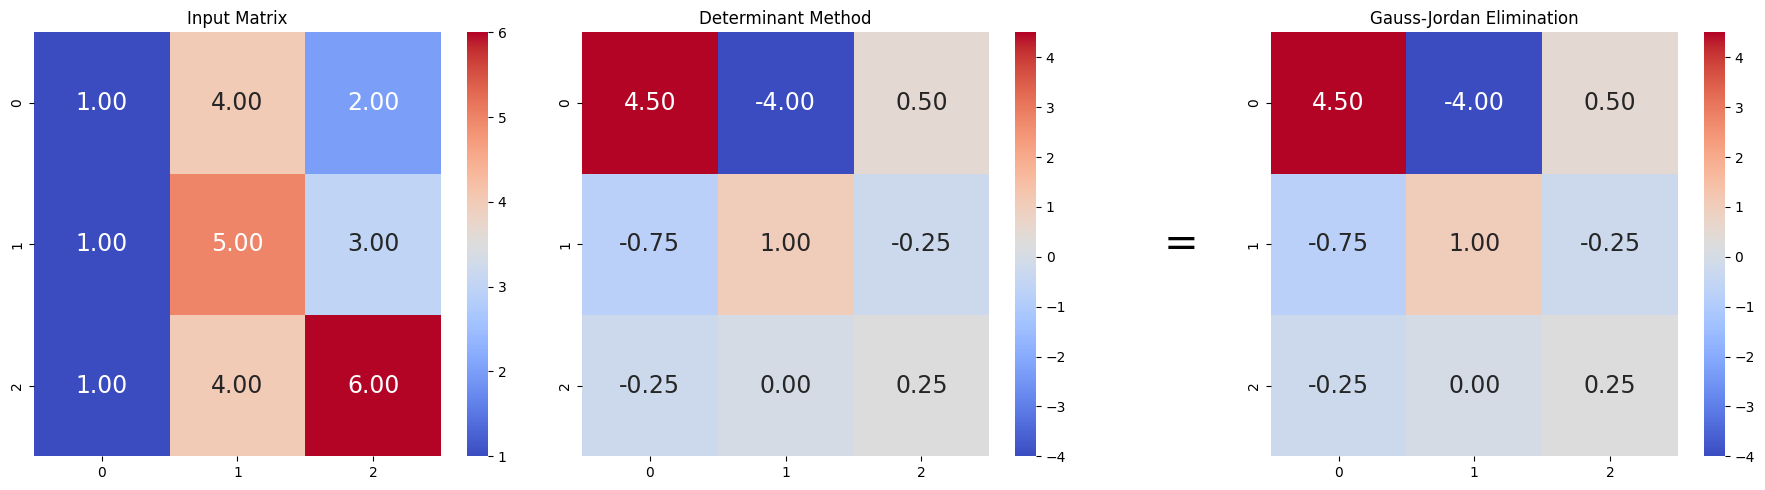

In [44]:
# 추가기능 2 : 히트맵 시각화 (행렬식 vs 가우스-조던)

annot_size = max(8, 20 - n)

fig, axes = plt.subplots(1, 4, figsize=(18, 5),
                         gridspec_kw={'width_ratios':[1,1,0.2,1]})

# (1) 입력한 행렬
sns.heatmap(matrix, annot=True, fmt=".2f", cmap="coolwarm",
            vmin=matrix.min(), vmax=matrix.max(),
            cbar=True, ax=axes[0],
            annot_kws={'size': annot_size})
axes[0].set_title("Input Matrix")

# (2) 행렬식 방식 역행렬
if inv_det is not None:
    vmin_val = min(inv_det.min(), inv_gj.min() if inv_gj is not None else inv_det.min())
    vmax_val = max(inv_det.max(), inv_gj.max() if inv_gj is not None else inv_det.max())
    sns.heatmap(inv_det, annot=True, fmt=".2f", cmap="coolwarm",
                vmin=vmin_val, vmax=vmax_val,
                cbar=True, ax=axes[1],
                annot_kws={'size': annot_size})
axes[1].set_title("Determinant Method")

# (3) 비교
axes[2].axis('off')
axes[2].text(0.5, 0.5, comparison, fontsize=30, ha='center', va='center')

# (4) 가우스-조던 소거법 역행렬
if inv_gj is not None:
    vmin_val = min(inv_det.min() if inv_det is not None else inv_gj.min(), inv_gj.min())
    vmax_val = max(inv_det.max() if inv_det is not None else inv_gj.max(), inv_gj.max())
    sns.heatmap(inv_gj, annot=True, fmt=".2f", cmap="coolwarm",
                vmin=vmin_val, vmax=vmax_val,
                cbar=True, ax=axes[3],
                annot_kws={'size': annot_size})
axes[3].set_title("Gauss-Jordan Elimination")

plt.tight_layout()
plt.show()